# Flight Price Prediction

### Data description

Booking a flight nowadays has become very unpredictable with respect to the fare of the flights. Also with the covid 19 impact on the transport industry, it has become more challenging to keep up with the fluctuating prices of fares of the flights. Anyone who has booked a flight ticket knows how unexpectedly the prices of tickets vary. The cheapest available ticket on a given flight gets more and less expensive over time. This usually happens as an attempt to maximize revenue based on:

1. Time of purchase patterns (making sure last-minute purchases are expensive) 
2. Keeping the flight as full as they want it (raising prices on a flight which is filling up in order to reduce sales and hold back inventory for those expensive last-minute expensive purchases)

With an aim to increase their profits the airlines play these kinds of tricks very often, making the customers clueless on what the fare might be. So here, we have to work on this project where we need to collect data of flight fares along with other features and work to make a model to predict fares of flights.

The project consists of three phases, and this notebook will contain the second and the third phase where we have to do some analysis on the scraped data amd find answers to the following queries: Do airfares change frequently? Do they move in small increments or in large jumps? Do they tend to go up or down over time? What is the best time to buy so that the consumer can save the most by taking the least risk? Does price increase as we get near to departure date? Are morning flights expensive?

After analysing the data and finding the answers, we need to build a machine learning model, and before model building we need to do all data pre-processing steps then try different models with different hyper parameters and select the best model.


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [2]:
df= pd.read_excel('final_flights.xlsx')
df

,Unnamed: 0,Airline,Date,Source,Destination,Departure_time,Arrival_time,Duration,Stops,Price
0,0,Air India,9 Oct,New Delhi,Mumbai,04:55,14:25,9h 30m,1 Stop,"17,990"
1,1,Air India,9 Oct,New Delhi,Mumbai,05:20,23:05,17h 45m,2 Stop(s),"9,000"
2,2,Air India,9 Oct,New Delhi,Mumbai,05:20,09:20,28h 00m,2 Stop(s),"9,000"
3,3,Air Asia,9 Oct,New Delhi,Mumbai,05:35,22:10,16h 35m,2 Stop(s),"6,166"
4,4,Air India,9 Oct,New Delhi,Mumbai,05:45,09:40,3h 55m,1 Stop,"7,468"
...,...,...,...,...,...,...,...,...,...,...
5835,6136,Vistara,Oct 24 2021,Mumbai,Ahmedabad,11:55,10:20,22h 25m,1 Stop,"10,668"
5836,6137,GO FIRST,Oct 24 2021,Mumbai,Ahmedabad,12:40,17:10,4h 30m,1 Stop,"9,461"
5837,6138,GO FIRST,Oct 24 2021,Mumbai,Ahmedabad,12:40,22:05,9h 25m,1 Stop,"9,461"
5838,6139,GO FIRST,Oct 24 2021,Mumbai,Ahmedabad,13:25,21:45,8h 20m,1 Stop,"10,537"


### EDA

In [3]:
df.shape

(5840, 10)

Here we have 5840 rows and 10 columns in the dataset.

In [4]:
df.columns

Index(['Unnamed: 0', 'Airline', 'Date', 'Source', 'Destination',
       'Departure_time', 'Arrival_time', 'Duration', 'Stops', 'Price'],
      dtype='object')

We can see that the dataset contains an unwanted column, i.e the index column, hence we will drop the column.

In [5]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [6]:
# Checking the data types.

df.dtypes

Airline           object
Date              object
Source            object
Destination       object
Departure_time    object
Arrival_time      object
Duration          object
Stops             object
Price             object
dtype: object

We can see that the dataset contains all object type data even our target column, in the further steps we have to convert them to numeric type in order to build our model.

In [7]:
# Checking for null values.

df.isnull().sum()

Airline           0
Date              0
Source            0
Destination       0
Departure_time    0
Arrival_time      0
Duration          0
Stops             0
Price             0
dtype: int64

Here, we can see that there are no null values present in the dataset.

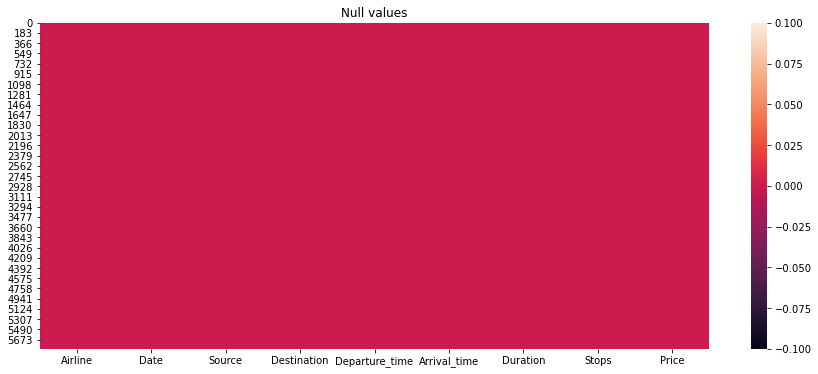

In [8]:
plt.figure(figsize=[15,6])
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

Through visualization also we can see that there are no null values present in any of the columns.

In [9]:
# checking the unique values of each columns.

for i in range(len(df.columns)):
    print(df.columns[i])
    print(df[df.columns[i]].unique())

Airline
['Air India' 'Air Asia' 'Vistara' 'SpiceJet' 'IndiGo' 'Go First'
 'AirAsia India' 'AirIndia' 'GO FIRST' 'TruJet']
Date
['9 Oct' '10 Oct' '12 Oct' '14 Oct' '16 Oct' '18 Oct' '20 Oct' '24 Oct'
 'Oct 10 2021' 'Oct 11 2021' 'Oct 12 2021' 'Oct 13 2021' 'Oct 14 2021'
 'Oct 15 2021' 'Oct 16 2021' 'Oct 17 2021' 'Oct 18 2021' 'Oct 19 2021'
 'Oct 20 2021' 'Oct 21 2021' 'Oct 22 2021' 'Oct 23 2021' 'Oct 24 2021'
 'Oct 25 2021']
Source
['New Delhi' 'Mumbai' 'Bangalore' 'Chennai' 'Hyderabad' 'Goa' 'Kolkata'
 'Pune' 'Jaipur' 'Delhi']
Destination
['Mumbai' 'Bangalore' 'Chennai' 'Hyderabad' 'Goa' 'Kolkata' 'Pune'
 'Jaipur' 'Lucknow' 'Delhi' 'Patna' 'Ahmedabad']
Departure_time
['04:55' '05:20' '05:35' '05:45' '06:00' '06:05' '06:10' '06:15' '06:50'
 '07:00' '07:10' '07:20' '07:30' '07:40' '08:00' '08:10' '06:35' '07:15'
 '05:00' '06:20' '05:55' '06:45' '06:55' '07:05' '07:25' '05:30' '07:50'
 '07:55' '08:05' '08:15' '08:30' '06:40' '08:20' '08:35' '09:30' '10:40'
 '11:30' '11:50' '15:00' '15:15'

We can see that there are some duplicate values in certain columns, also there are junk data present attached to the actual values. we need to clean the data in order to proceed.

### Data Cleaning

### Feature Airline

In [10]:
df['Airline'].unique()

array(['Air India', 'Air Asia', 'Vistara', 'SpiceJet', 'IndiGo',
       'Go First', 'AirAsia India', 'AirIndia', 'GO FIRST', 'TruJet'],
      dtype=object)

Here we can see that we have duplicate values for 'air india', 'air asia' and 'go first'. Lets correct this.

In [11]:
df["Airline"].replace("Air India", "AirIndia", inplace=True)
df["Airline"].replace("AirAsia India", "Air Asia", inplace=True)
df["Airline"].replace("GO FIRST", "Go First", inplace=True)

In [12]:
df['Airline'].value_counts()

AirIndia    1602
IndiGo      1377
Vistara     1042
Air Asia     738
Go First     589
SpiceJet     489
TruJet         3
Name: Airline, dtype: int64

The duplicacy has been corrected, and here we can see that the 'TruJet' airlines contain only 3 records in the whole dataset, this may lead to a weaker performing model, hence we will drop those records.

In [13]:
df= df[df["Airline"].str.contains("TruJet")==False]

In [14]:
df['Airline'].unique()

array(['AirIndia', 'Air Asia', 'Vistara', 'SpiceJet', 'IndiGo',
       'Go First'], dtype=object)

Now we can see that the records are dropped.

### Feature Date

In [15]:
df['Date'].unique()

array(['9 Oct', '10 Oct', '12 Oct', '14 Oct', '16 Oct', '18 Oct',
       '20 Oct', '24 Oct', 'Oct 10 2021', 'Oct 11 2021', 'Oct 12 2021',
       'Oct 13 2021', 'Oct 14 2021', 'Oct 15 2021', 'Oct 16 2021',
       'Oct 17 2021', 'Oct 18 2021', 'Oct 19 2021', 'Oct 20 2021',
       'Oct 21 2021', 'Oct 22 2021', 'Oct 23 2021', 'Oct 24 2021',
       'Oct 25 2021'], dtype=object)

Here we can see that all the dates are of the same month and same year, hence we can just keep the date as the feature.

In [16]:
df['Date'] = df['Date'].str.replace(' 2021','')
df['Date'] = df['Date'].str.replace(' Oct','')
df['Date'] = df['Date'].str.replace('Oct ','')

In [17]:
df['Date'].unique()

array(['9', '10', '12', '14', '16', '18', '20', '24', '11', '13', '15',
       '17', '19', '21', '22', '23', '25'], dtype=object)

Now we can see that the feature contains only the date.

In [18]:
df['Date']= df['Date'].astype(int)

Here we have converted the feature to integer datatype.

### Source feature

In [19]:
df['Source'].unique()

array(['New Delhi', 'Mumbai', 'Bangalore', 'Chennai', 'Hyderabad', 'Goa',
       'Kolkata', 'Pune', 'Jaipur', 'Delhi'], dtype=object)

We can see that the feature contains duplicate values for 'delhi', lets correct this.

In [20]:
df["Source"].replace("New Delhi", "Delhi", inplace=True)

In [21]:
df['Source'].unique()

array(['Delhi', 'Mumbai', 'Bangalore', 'Chennai', 'Hyderabad', 'Goa',
       'Kolkata', 'Pune', 'Jaipur'], dtype=object)

The duplicacy has been removed.

### Feature departure_time

In [22]:
df['Departure_time']

0       04:55
1       05:20
2       05:20
3       05:35
4       05:45
        ...  
5834    11:55
5835    11:55
5836    12:40
5837    12:40
5838    13:25
Name: Departure_time, Length: 5837, dtype: object

The feature contains time data but belongs to object data type, lets treat this.

In [23]:
# converting object datatype to datetime.

df['Departure_time']= pd.to_datetime(df['Departure_time']) 

In [24]:
df.dtypes

Airline                   object
Date                       int32
Source                    object
Destination               object
Departure_time    datetime64[ns]
Arrival_time              object
Duration                  object
Stops                     object
Price                     object
dtype: object

The datatype has been changed to dateandtime.

In [25]:
# Extracting the hour and minute into two seperate columns.

df['Dep_hr']=df['Departure_time'].dt.hour
df['Dep_min']=df['Departure_time'].dt.minute

In [26]:
# dropping the base column.

df.drop(['Departure_time'], axis=1, inplace=True)
df

,Airline,Date,Source,Destination,Arrival_time,Duration,Stops,Price,Dep_hr,Dep_min
0,AirIndia,9,Delhi,Mumbai,14:25,9h 30m,1 Stop,"17,990",4,55
1,AirIndia,9,Delhi,Mumbai,23:05,17h 45m,2 Stop(s),"9,000",5,20
2,AirIndia,9,Delhi,Mumbai,09:20,28h 00m,2 Stop(s),"9,000",5,20
3,Air Asia,9,Delhi,Mumbai,22:10,16h 35m,2 Stop(s),"6,166",5,35
4,AirIndia,9,Delhi,Mumbai,09:40,3h 55m,1 Stop,"7,468",5,45
...,...,...,...,...,...,...,...,...,...,...
5834,Vistara,24,Mumbai,Ahmedabad,08:05,20h 10m,1 Stop,"10,668",11,55
5835,Vistara,24,Mumbai,Ahmedabad,10:20,22h 25m,1 Stop,"10,668",11,55
5836,Go First,24,Mumbai,Ahmedabad,17:10,4h 30m,1 Stop,"9,461",12,40
5837,Go First,24,Mumbai,Ahmedabad,22:05,9h 25m,1 Stop,"9,461",12,40


Now we have two new features containing the deaprture hour and minute, and the column containing the whole data is dropped.

### Feature Arrival_time

In [27]:
df['Arrival_time']

0       14:25
1       23:05
2       09:20
3       22:10
4       09:40
        ...  
5834    08:05
5835    10:20
5836    17:10
5837    22:05
5838    21:45
Name: Arrival_time, Length: 5837, dtype: object

Just like departure time, here too we have the same type of data with datatype as object. Lets treat this with the same approach.

In [28]:
# converting object datatype to datetime.

df['Arrival_time']= pd.to_datetime(df['Arrival_time']) 

In [29]:
# Extracting the hour and minute into two seperate columns.

df['Arv_hr']=df['Arrival_time'].dt.hour
df['Arv_min']=df['Arrival_time'].dt.minute

In [30]:
# dropping the base column.

df.drop(['Arrival_time'], axis=1, inplace=True)
df

,Airline,Date,Source,Destination,Duration,Stops,Price,Dep_hr,Dep_min,Arv_hr,Arv_min
0,AirIndia,9,Delhi,Mumbai,9h 30m,1 Stop,"17,990",4,55,14,25
1,AirIndia,9,Delhi,Mumbai,17h 45m,2 Stop(s),"9,000",5,20,23,5
2,AirIndia,9,Delhi,Mumbai,28h 00m,2 Stop(s),"9,000",5,20,9,20
3,Air Asia,9,Delhi,Mumbai,16h 35m,2 Stop(s),"6,166",5,35,22,10
4,AirIndia,9,Delhi,Mumbai,3h 55m,1 Stop,"7,468",5,45,9,40
...,...,...,...,...,...,...,...,...,...,...,...
5834,Vistara,24,Mumbai,Ahmedabad,20h 10m,1 Stop,"10,668",11,55,8,5
5835,Vistara,24,Mumbai,Ahmedabad,22h 25m,1 Stop,"10,668",11,55,10,20
5836,Go First,24,Mumbai,Ahmedabad,4h 30m,1 Stop,"9,461",12,40,17,10
5837,Go First,24,Mumbai,Ahmedabad,9h 25m,1 Stop,"9,461",12,40,22,5


The feature has been treated.

### Feature Duration

In [31]:
df['Duration']

0         9h 30m
1        17h 45m
2        28h 00m
3        16h 35m
4         3h 55m
          ...   
5834    20h 10m 
5835    22h 25m 
5836     4h 30m 
5837     9h 25m 
5838     8h 20m 
Name: Duration, Length: 5837, dtype: object

The data conatins time of duration and is in object data type. Lets treat this.

In [32]:
# extracting the hour and minute into another column by splitting.

df[['Dur_hr','Dur_min']] = df.Duration.str.split('h ',1, expand=True)

In [33]:
# cleaning the duration_minute column.

df['Dur_min'] = df['Dur_min'].str.replace('m','')
df['Dur_min'] = df['Dur_min'].str.replace(' ','')

In [34]:
# Converting the datatype to integer.

df['Dur_min']= df['Dur_min'].astype(int)
df['Dur_hr']= df['Dur_hr'].astype(int)

In [35]:
# dropping the base column.

df.drop(['Duration'], axis=1, inplace=True)
df

,Airline,Date,Source,Destination,Stops,Price,Dep_hr,Dep_min,Arv_hr,Arv_min,Dur_hr,Dur_min
0,AirIndia,9,Delhi,Mumbai,1 Stop,"17,990",4,55,14,25,9,30
1,AirIndia,9,Delhi,Mumbai,2 Stop(s),"9,000",5,20,23,5,17,45
2,AirIndia,9,Delhi,Mumbai,2 Stop(s),"9,000",5,20,9,20,28,0
3,Air Asia,9,Delhi,Mumbai,2 Stop(s),"6,166",5,35,22,10,16,35
4,AirIndia,9,Delhi,Mumbai,1 Stop,"7,468",5,45,9,40,3,55
...,...,...,...,...,...,...,...,...,...,...,...,...
5834,Vistara,24,Mumbai,Ahmedabad,1 Stop,"10,668",11,55,8,5,20,10
5835,Vistara,24,Mumbai,Ahmedabad,1 Stop,"10,668",11,55,10,20,22,25
5836,Go First,24,Mumbai,Ahmedabad,1 Stop,"9,461",12,40,17,10,4,30
5837,Go First,24,Mumbai,Ahmedabad,1 Stop,"9,461",12,40,22,5,9,25


We can see that the required data have been extracted and saved in different columns and the base column has been dropped.

### Feature Stops

In [36]:
df['Stops'].unique()

array(['1 Stop', '2 Stop(s)', 'Non Stop', '3 Stop(s)', '4 Stop(s)',
       ' 1 Stop', 'Non-Stop', ' 4 Stop', ' 3 Stop', ' 2 Stop'],
      dtype=object)

Here the data type is object as the data contains unwanted strings in it. lets clean the data.

In [37]:
df['Stops']= df['Stops'].str.replace(r" Stop\(.*\)","")
df['Stops']= df['Stops'].str.replace('Stop', '')

In [38]:
# Replacing 'Non-stop' flights with 0.

df['Stops']= df['Stops'].str.replace('Non-', '0')
df['Stops']= df['Stops'].str.replace('Non ', '0')
df['Stops']= df['Stops'].str.replace(' ', '')

In [39]:
df['Stops'].unique()

array(['1', '2', '0', '3', '4'], dtype=object)

We can see that the data has been cleaned but it still belongs to object datatype. lets correct this.

In [40]:
df['Stops']= df['Stops'].astype(int)

The column has been treated, lets proceed.

### Target column

In [41]:
df['Price']

0       17,990
1        9,000
2        9,000
3        6,166
4        7,468
         ...  
5834    10,668
5835    10,668
5836     9,461
5837     9,461
5838    10,537
Name: Price, Length: 5837, dtype: object

The target column also belongs to object datatype, this is because of the presence of some unwanted characters in the values. Lets clean this.

In [42]:
df['Price']= df['Price'].str.replace(',', '')

In [43]:
# Converting datatype to integet.

df['Price']= df['Price'].astype(int)

The target column has been cleaned.

### Data Preprocessing

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5837 entries, 0 to 5838
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Airline      5837 non-null   object
 1   Date         5837 non-null   int32 
 2   Source       5837 non-null   object
 3   Destination  5837 non-null   object
 4   Stops        5837 non-null   int32 
 5   Price        5837 non-null   int32 
 6   Dep_hr       5837 non-null   int64 
 7   Dep_min      5837 non-null   int64 
 8   Arv_hr       5837 non-null   int64 
 9   Arv_min      5837 non-null   int64 
 10  Dur_hr       5837 non-null   int32 
 11  Dur_min      5837 non-null   int32 
dtypes: int32(5), int64(4), object(3)
memory usage: 478.8+ KB


We can see that the dataset has been cleaned and the numeric data are converted to integer datatype. We can proceed now.

In [45]:
df.describe()

,Date,Stops,Price,Dep_hr,Dep_min,Arv_hr,Arv_min,Dur_hr,Dur_min
count,5837.000000,5837.000000,5837.000000,5837.000000,5837.00000,5837.000000,5837.000000,5837.000000,5837.000000
mean,16.341614,1.007195,9843.032551,8.078294,24.07658,14.291074,28.192565,10.287819,27.778825
std,4.765020,0.661237,4165.970906,3.670530,18.02430,5.309226,17.595483,7.490827,17.350544
min,9.000000,0.000000,3497.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1.000000,7260.000000,6.000000,10.00000,10.000000,15.000000,5.000000,15.000000
50%,16.000000,1.000000,9201.000000,7.000000,20.00000,15.000000,30.000000,9.000000,30.000000
75%,20.000000,1.000000,11659.000000,9.000000,40.00000,19.000000,45.000000,14.000000,45.000000
max,25.000000,4.000000,58896.000000,23.000000,55.00000,23.000000,55.000000,42.000000,55.000000


Here we can check the description of all the numeric columns. Most of the data present here are of date and time, except the target column and stops. the date and time data belongs to a particular range and the values of mean and median in the features are very close to each other, which means that the data sholud normally distributed. Also we can see that the columns have very less difference between the mean and the maximum value, which means that the data is very less prone to outliers.

### Visualization

<function matplotlib.pyplot.show(*args, **kw)>

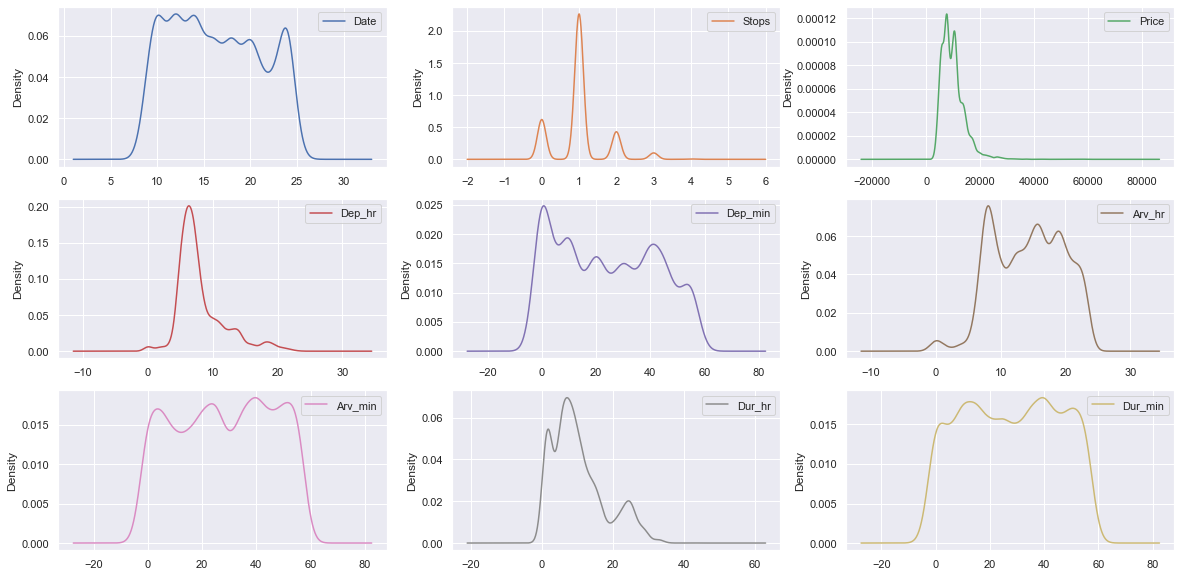

In [46]:
sns.set(style='darkgrid')
df.plot(kind='density', subplots= True, layout=(3,3),sharex=False, legend=True, figsize=[20,10])
plt.show

Here, we can check the distribution of the numeric columns. lets check closely.

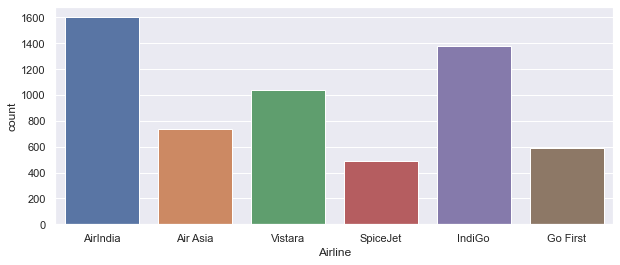

In [47]:
plt.figure(figsize=[10,4])
sns.countplot(df['Airline'])
plt.show()

We can see that the data are distributed nicely among all the airlines, with majority of the fligts being of AirIndia.

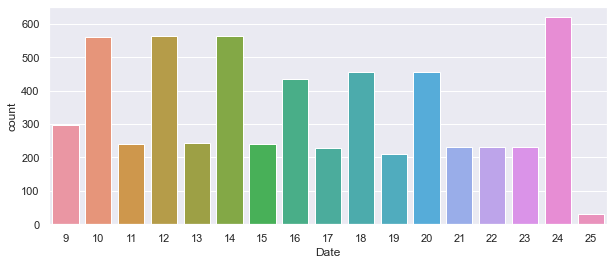

In [48]:
plt.figure(figsize=[10,4])
sns.countplot(df['Date'])
plt.show()

Here we can see that the feature has little variance in the distribution of the data.

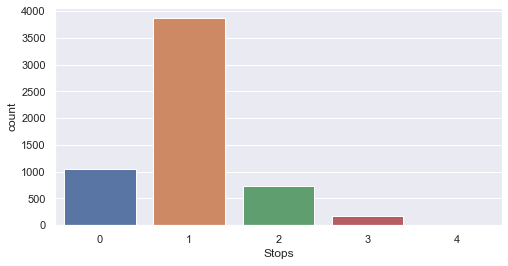

In [49]:
plt.figure(figsize=[8,4])
sns.countplot(df['Stops'])
plt.show()

Here we can see that the majority of the flights are one stop flights, which is followed by non-stop flights. Flights with 4 stops are very less.

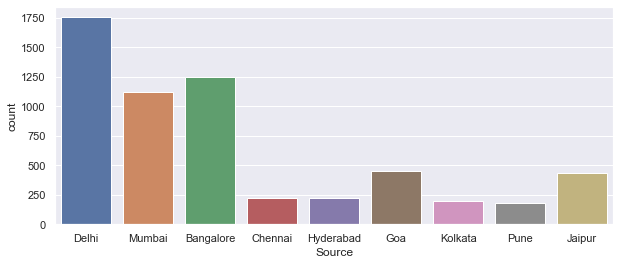

In [50]:
plt.figure(figsize=[10,4])
sns.countplot(df['Source'])
plt.show()

We can see that the data contains most of the flighs that source from Delhi, which is followed by Bangalore and mumbai.

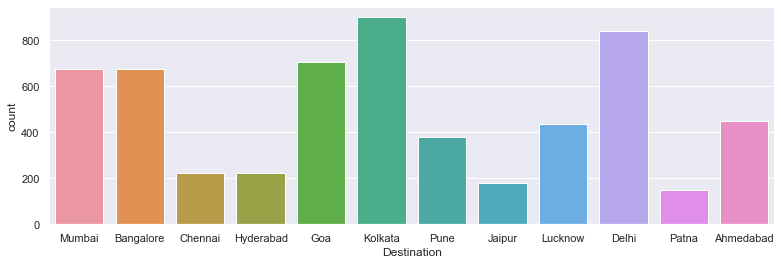

In [51]:
plt.figure(figsize=[13,4])
sns.countplot(df['Destination'])
plt.show()

Here we see that the flights are bound for different cities and the data is distributed among them in variance.

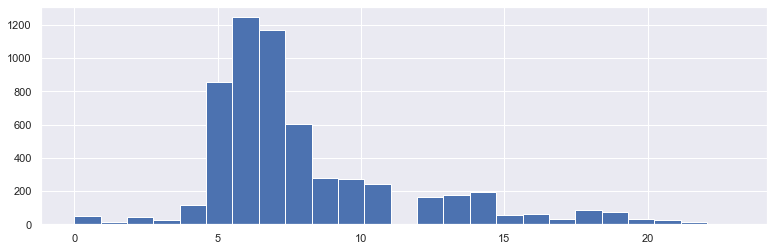

In [52]:
plt.figure(figsize=[13,4])
plt.hist(df['Dep_hr'], bins=25)
plt.show()

We can see that the majority of flights depart between 5 to 10 AM. And some skewness can be seen in the data, right tailes skewed.

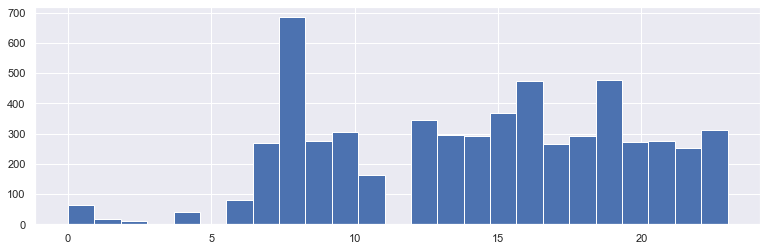

In [53]:
plt.figure(figsize=[13,4])
plt.hist(df['Arv_hr'], bins=25)
plt.show()

Here we can see that there is an near equal distribution of flights arriaving between 5 AM to 12 AM, A little variance can also be seen.

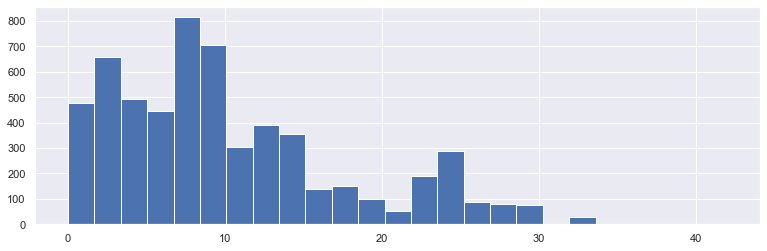

In [54]:
plt.figure(figsize=[13,4])
plt.hist(df['Dur_hr'], bins=25)
plt.show()

Here we can see that most of the flight durations are between 1 to 10 hours and hence some skewness can be seen here, right tailed skewed.

### Encoding categorical data

In [55]:
df.dtypes

Airline        object
Date            int32
Source         object
Destination    object
Stops           int32
Price           int32
Dep_hr          int64
Dep_min         int64
Arv_hr          int64
Arv_min         int64
Dur_hr          int32
Dur_min         int32
dtype: object

Three of the features belong to object data type, we need to encode them into numeric in order to proceed.

In [44]:
# Creating a copy of non-encoded dataframe.

df1= df.copy()

In [45]:
# Encoding

from sklearn.preprocessing import OrdinalEncoder

enc= OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes== 'O':
        df[i]= enc.fit_transform(df[i].values.reshape(-1,1))

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5837 entries, 0 to 5838
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Airline      5837 non-null   int32
 1   Date         5837 non-null   int32
 2   Source       5837 non-null   int32
 3   Destination  5837 non-null   int32
 4   Stops        5837 non-null   int32
 5   Price        5837 non-null   int32
 6   Dep_hr       5837 non-null   int64
 7   Dep_min      5837 non-null   int64
 8   Arv_hr       5837 non-null   int64
 9   Arv_min      5837 non-null   int64
 10  Dur_hr       5837 non-null   int32
 11  Dur_min      5837 non-null   int32
dtypes: int32(8), int64(4)
memory usage: 570.4 KB


Our dataset has been encoded, we can proceed now.

### Checking Correlation and finding answers to the queries.

In [59]:
cor= df.corr()
cor

,Airline,Date,Source,Destination,Stops,Price,Dep_hr,Dep_min,Arv_hr,Arv_min,Dur_hr,Dur_min
Airline,1.000000,-0.032599,-0.029082,-0.010139,-0.298132,-0.040959,0.061299,0.047585,-0.026852,0.135219,-0.055401,0.000517
Date,-0.032599,1.000000,-0.068650,-0.102139,-0.038740,-0.170830,-0.010709,-0.009494,-0.030502,0.011555,-0.044817,0.026257
Source,-0.029082,-0.068650,1.000000,-0.259629,0.086889,0.033322,0.190214,0.006543,0.110516,0.044966,0.096972,0.101735
Destination,-0.010139,-0.102139,-0.259629,1.000000,-0.059509,0.053615,0.083605,-0.073043,0.017486,-0.131269,-0.084564,-0.057612
Stops,-0.298132,-0.038740,0.086889,-0.059509,1.000000,0.436144,-0.047110,0.067986,0.313584,0.006052,0.578128,0.007591
Price,-0.040959,-0.170830,0.033322,0.053615,0.436144,1.000000,-0.037564,-0.024861,0.213427,0.002661,0.382863,-0.038945
Dep_hr,0.061299,-0.010709,0.190214,0.083605,-0.047110,-0.037564,1.000000,-0.042963,0.109584,0.016943,0.013794,0.053381
Dep_min,0.047585,-0.009494,0.006543,-0.073043,0.067986,-0.024861,-0.042963,1.000000,-0.012876,0.039391,0.007198,-0.017381
Arv_hr,-0.026852,-0.030502,0.110516,0.017486,0.313584,0.213427,0.109584,-0.012876,1.000000,0.018215,0.087471,0.092780
Arv_min,0.135219,0.011555,0.044966,-0.131269,0.006052,0.002661,0.016943,0.039391,0.018215,1.000000,0.065244,0.064976


Here we can see the correlation among all the columns in the dataset, lets visualize it for better understanding.

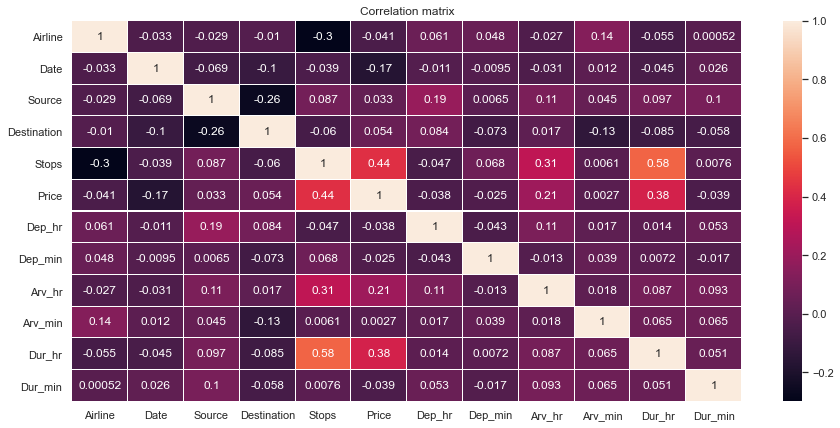

In [81]:
plt.figure(figsize=[15,7])
sns.heatmap(cor, annot=True, linewidth=0.1);
plt.title('Correlation matrix')
plt.show()

In the correlation matrix, we can see some positive as well as negative correlations. Among the independent columns, We can see that the no of stops and duration have a good positive correlation among them. Also we can be seen that the airlines have a very negative correlation with the no of stops. Now lets check the correlation of the target with the independent columns.

In [82]:
cor['Price'].sort_values(ascending=False)

Price          1.000000
Stops          0.436144
Dur_hr         0.382863
Arv_hr         0.213427
Destination    0.053615
Source         0.033322
Arv_min        0.002661
Dep_min       -0.024861
Dep_hr        -0.037564
Dur_min       -0.038945
Airline       -0.040959
Date          -0.170830
Name: Price, dtype: float64

We can check the correlation of our target with the independent columns. lets visualize it for understanding better.

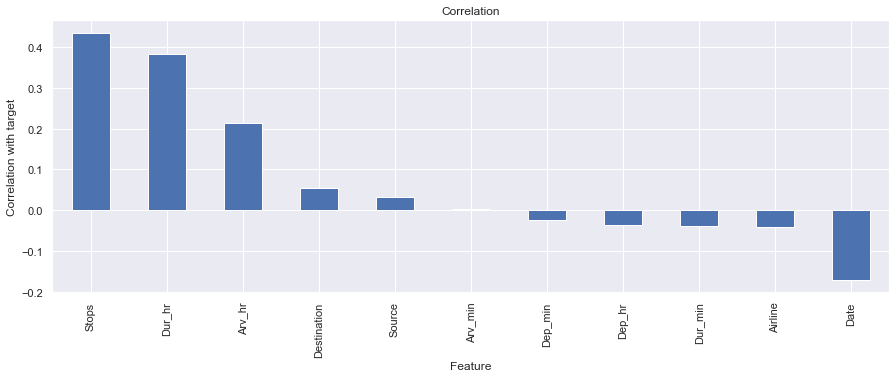

In [83]:
plt.figure(figsize=(15,5))
cor['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Correlation with target')
plt.title('Correlation')
plt.show()

The visualization shows that the No of stops has the highest correlation with the target also the Duration has a very good correlation with the target as well. The date of journey column is showing us the the most negative relation among all. The Arrival minute column can be see having a near zero correlation with the target. Now lets inspect these relations closely.

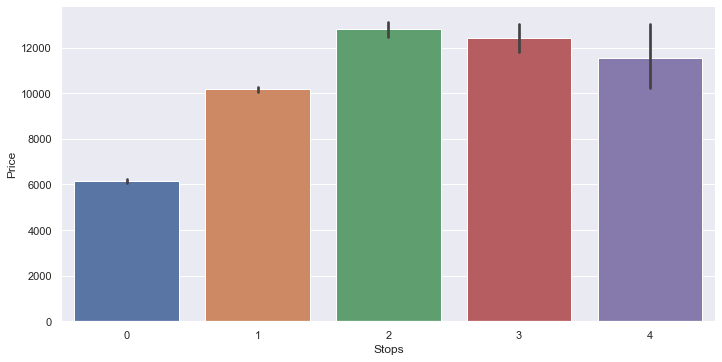

In [85]:
sns.catplot(x='Stops',y='Price', data=df, kind='bar', aspect=2);

Here we can see a good positive correlation between the columns. As the number of stops increases, the distance to travel also increases and hence there is an increase in price as the no of stops increases.

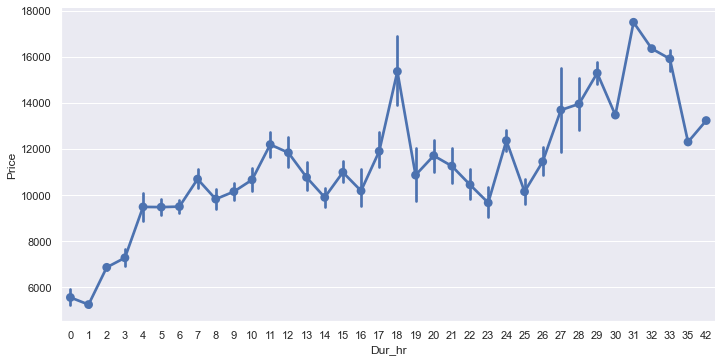

In [87]:
sns.factorplot(x ='Dur_hr', y ='Price', data = df, aspect=2);

Here as well we can see a good positive correlation between the columns. As the duration increases, the flight prices also increases. 

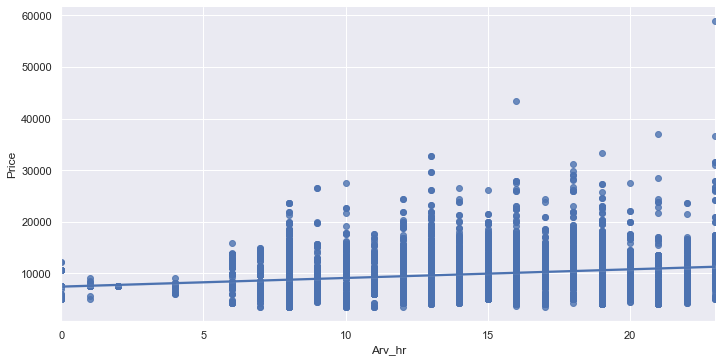

In [66]:
sns.lmplot(x='Arv_hr', y='Price',data=df, aspect=2);

The graph shows a positive correlation between the columns, this means the flights that arrive later in the day have a comparatively higher price.

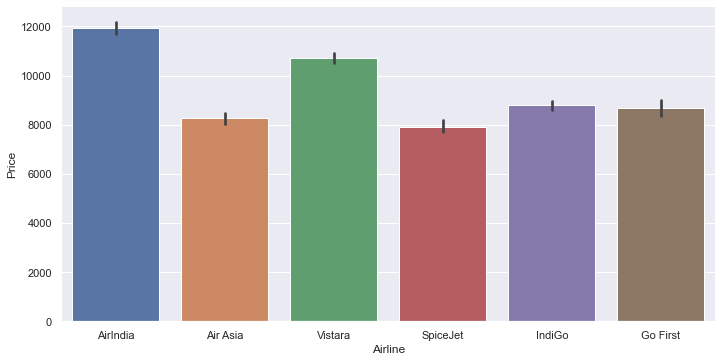

In [102]:
sns.catplot(x='Airline',y='Price', data=df1, kind='bar', aspect=2);

Here we can see that the fare prices of AirIndia are comparatively higher than the others, this is followed by Vistara airways.

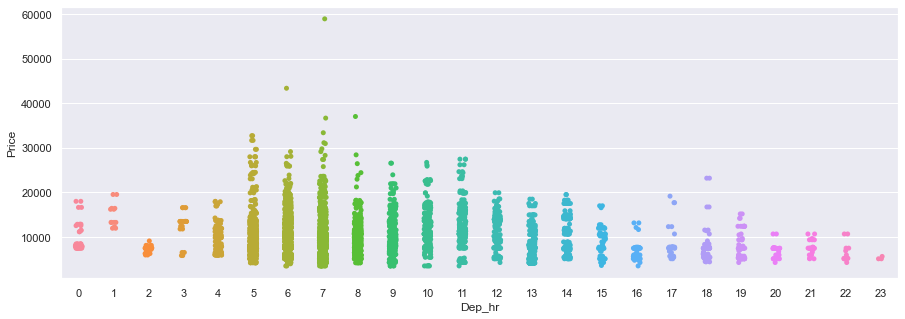

In [94]:
plt.figure(figsize=[15,5])
sns.stripplot(data= df1, x='Dep_hr', y='Price')
plt.show()

We can see that there an upward trend followed by a downward trend in the graph. The most expensive Flights depart between 5AM to 12PM in the morning. Hence we can say: 

1. The prices tend to go up and down over time.
2. The expensive flights run between 5 to 12 in the morning when compared to other times of the day, but there are cheaper flights as well during that time of the day. So we can say morning that flights have both expensive as well as cheaper flighs.

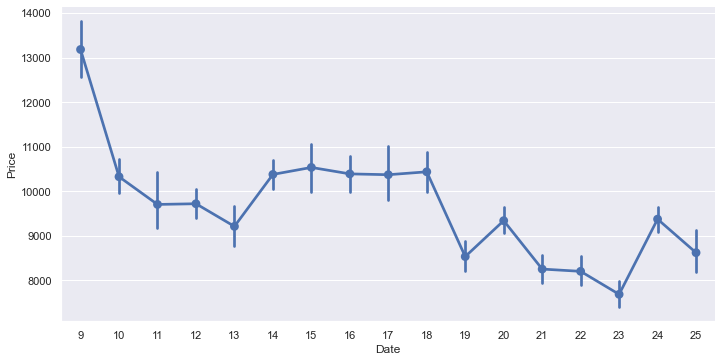

In [99]:
sns.factorplot(x ='Date', y ='Price', data = df, aspect=2);

With the Date feature, we can see a negative correlation with the target, which means that as we get closer to the departure date, the prices of the fares increases.

By analysing all the above graphs, we can say that:
   
1. Yes, airfares do change frequently, it changes with different times of the day and also for different dates.
2. The fare for the present day flights are very high and for the next day there is a drop in the price with a quite larg jump, and following this the fares of flights vary in small jumps in the prices decreasing as we go further in the date.
3. We can say that the best time to buy tickets is a week or two before the travel date, and if this is not possible customers can buy ticket atleast 2 days before the travel and they can opt for flights between 5AM to 2PM of the day as the majority of the flights fly between these hours and the customers will find more options on flights during these hours, also the customers should keep into consideration the duration of the fligh they opt for as the duration is positive correlated with the price of fare.

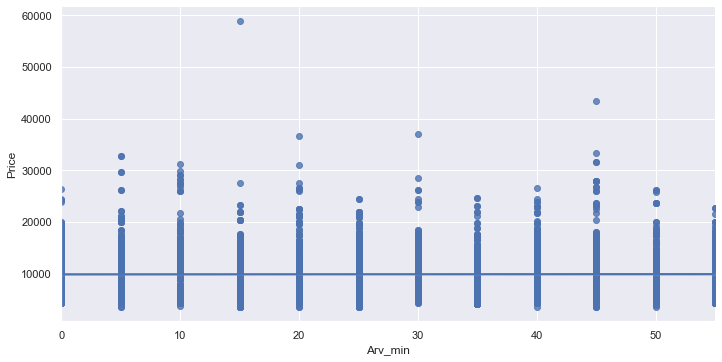

In [61]:
sns.lmplot(x ='Arv_min',y ='Price', data = df, aspect=2);

In the graph, we can see no correlation between the feature column and the target, A near zero correlation, and this may affect our model performance, Hence we will be dropping the feature.

In [46]:
df.drop(['Arv_min'], axis=1, inplace=True)

### Checking for Outliers

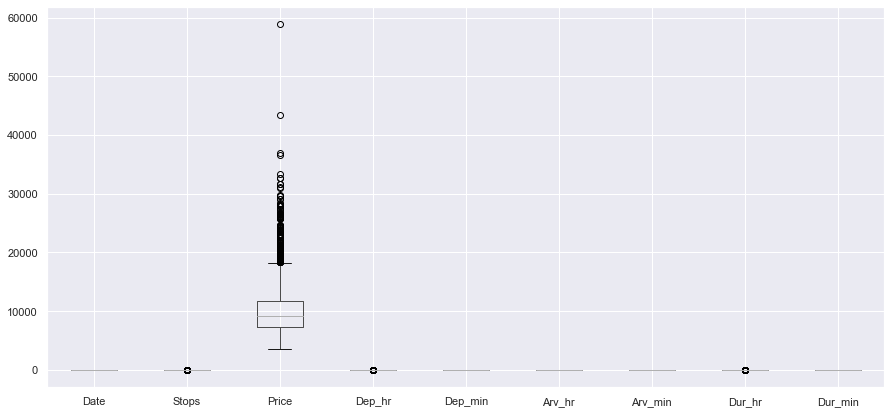

In [87]:
# Checking for outliers in the numeric data.

df1.boxplot(figsize=(15,7))
plt.show()

We can see some outliers present in the target column, but we can't make alterations with the target data.

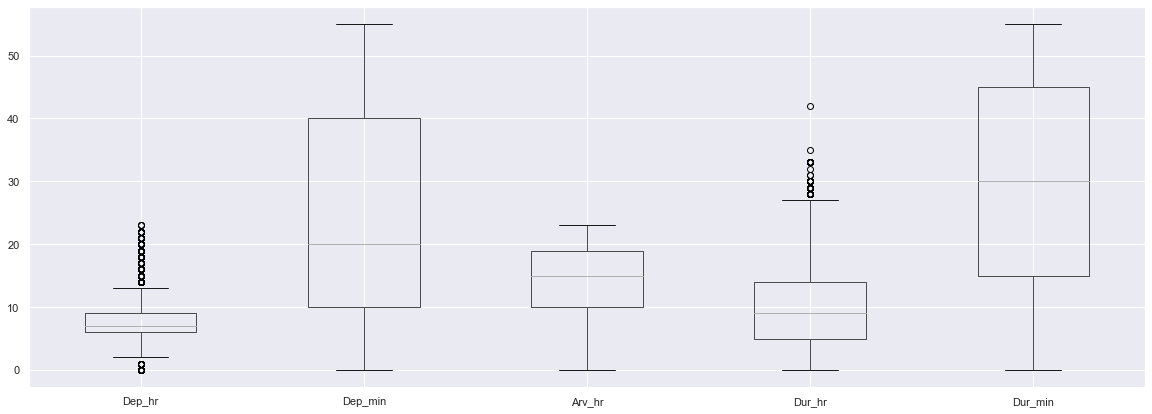

In [85]:
df.iloc[:,6:].boxplot(figsize=[20,7])
plt.show()

Here we can see some outliers present in the Departure data and Duration data. Bus since the departure data lies between a range of 0 to 24, there can be no outliers present there. Also there are very few outliers present in the duration column which are very close to the threshold, hence we will keep the data as removing them will lead to data loss.

### Checking Skewness

In [47]:
# checking skewness for continious numeric columns.

col=['Arv_hr','Dep_hr','Dep_min','Dur_hr','Dur_min','Stops']
df[col].skew()

Arv_hr    -0.179454
Dep_hr     1.386065
Dep_min    0.157864
Dur_hr     0.911712
Dur_min   -0.024872
Stops      0.725035
dtype: float64

In [48]:
# treating skewness by taking the threshold of -0.5 to +0.5.

from sklearn.preprocessing import power_transform

for i in df[col]:
    if df[i].skew()>0.5:
        df[i]= power_transform(df[i].values.reshape(-1,1))
        
    if df[i].skew()<-0.5:
        df[i]= power_transform(df[i].values.reshape(-1,1))

df.skew()

Airline        0.199050
Date           0.158064
Source         0.410213
Destination    0.080523
Stops          0.020242
Price          1.711768
Dep_hr         0.110741
Dep_min        0.157864
Arv_hr        -0.179454
Dur_hr        -0.049026
Dur_min       -0.024872
dtype: float64

We have treated the skewness in the data, we can proceed now.

### Scaling

In [49]:
# First lets split the data into target and features.

x= df.drop(['Price'], axis=1)
y= df['Price']

In [50]:
# Scaling

from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x=pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x

,Airline,Date,Source,Destination,Stops,Dep_hr,Dep_min,Arv_hr,Dur_hr,Dur_min
0,-0.845400,-1.540863,-0.457666,1.156826,0.075860,-1.283834,1.715799,-0.054829,0.072722,0.128029
1,-0.845400,-1.540863,-0.457666,1.156826,1.428901,-0.874914,-0.226191,1.640479,0.971304,0.992629
2,-0.845400,-1.540863,-0.457666,1.156826,1.428901,-0.874914,-0.226191,-0.996666,1.813683,-1.601172
3,-1.444259,-1.540863,-0.457666,1.156826,1.428901,-0.874914,0.606090,1.452111,0.877484,0.416229
4,-0.845400,-1.540863,-0.457666,1.156826,0.075860,-0.874914,1.160945,-0.996666,-1.070701,1.569029
...,...,...,...,...,...,...,...,...,...,...
5832,1.550037,1.607347,1.456764,-1.565182,0.075860,0.891901,1.715799,-1.185034,1.231721,-1.024772
5833,1.550037,1.607347,1.456764,-1.565182,0.075860,0.891901,1.715799,-0.808299,1.390607,-0.160172
5834,-0.246541,1.607347,1.456764,-1.565182,0.075860,1.119647,0.883517,0.510274,-0.817907,0.128029
5835,-0.246541,1.607347,1.456764,-1.565182,0.075860,1.119647,0.883517,1.452111,0.072722,-0.160172


### Finding the best Random state

In [53]:
maxscr=0
maxrs=0
for i in range(1,100):
    x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.20,random_state=i)
    lr= LinearRegression()
    lr.fit(x_train,y_train)
    predlr= lr.predict(x_test)
    scr= r2_score(y_test,predlr)
    if scr>maxscr:
        maxscr=scr
        maxrs= i
print('Best score: ', maxscr,'on random state', maxrs)

Best score:  0.3196552990001651 on random state 57


In [54]:
# Creating train and test split using the random state found best.

x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=.20,random_state=57)

### Model Building

In [55]:
lr.fit(x_train,y_train)
predlr= lr.predict(x_test)

print('Score: ',lr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predlr))
print('Mean absolute error:', mean_absolute_error(y_test,predlr))
print('Mean squared error:', mean_squared_error(y_test,predlr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predlr)))

Score:  0.25895014660531457
r2 score:  0.3196552990001651
Mean absolute error: 2365.0665882032818
Mean squared error: 11440676.34430043
Root mean squared error: 3382.4068862720274


In [56]:
from sklearn.tree import DecisionTreeRegressor

dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
preddt= dt.predict(x_test)

print('Score: ',dt.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preddt))
print('Mean absolute error:', mean_absolute_error(y_test,preddt))
print('Mean squared error:', mean_squared_error(y_test,preddt))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,preddt)))

Score:  0.9988874940041893
r2 score:  0.7536678152554132
Mean absolute error: 701.5667808219179
Mean squared error: 4142321.965182649
Root mean squared error: 2035.2695067687348


In [57]:
from sklearn.ensemble import RandomForestRegressor

fr=RandomForestRegressor()
fr.fit(x_train,y_train)
predfr=fr.predict(x_test)

print('Score: ',fr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predfr))
print('Mean absolute error:', mean_absolute_error(y_test,predfr))
print('Mean squared error:', mean_squared_error(y_test,predfr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predfr)))

Score:  0.9712505417803431
r2 score:  0.7974581764516215
Mean absolute error: 849.7857910433839
Mean squared error: 3405943.260814737
Root mean squared error: 1845.5197806620056


In [58]:
from sklearn.svm import SVR

svr= SVR(kernel='linear')
svr.fit(x_train,y_train)
preds= svr.predict(x_test)

print('Score: ',svr.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,preds))
print('Mean absolute error:', mean_absolute_error(y_test,preds))
print('Mean squared error:', mean_squared_error(y_test,preds))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,preds)))

Score:  0.1893517293107334
r2 score:  0.2528631394752313
Mean absolute error: 2407.0639032352387
Mean squared error: 12563853.284370162
Root mean squared error: 3544.552621187921


In [61]:
from sklearn.linear_model import Lasso

ls= Lasso()
ls.fit(x_train,y_train)
predrd= ls.predict(x_test)

print('Score: ',ls.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predrd))
print('Mean absolute error:', mean_absolute_error(y_test,predrd))
print('Mean squared error:', mean_squared_error(y_test,predrd))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predrd)))

Score:  0.2589496294467364
r2 score:  0.31968173343515505
Mean absolute error: 2365.027754207589
Mean squared error: 11440231.82284738
Root mean squared error: 3382.3411748147732


In [63]:
from xgboost import XGBRegressor

xgb = XGBRegressor()
xgb.fit(x_train,y_train)
predx= xgb.predict(x_test)

print('Score: ',xgb.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predx))
print('Mean absolute error:', mean_absolute_error(y_test,predx))
print('Mean squared error:', mean_squared_error(y_test,predx))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predx)))

Score:  0.9550452101497624
r2 score:  0.7516614514340874
Mean absolute error: 1065.9408841067798
Mean squared error: 4176060.9787664535
Root mean squared error: 2043.5412838419618


In the above codes, we are importing the models and then assigning the model to a variable. Using that variable we are training the model with the train sets of the features and target and then we are predicting the target for the test features set. And finally by comparing the predicted target and the actual target, we get the r2 score of the model along with the errors in it. we also find the training score of the model by comparing the training sets.

By comparing all the above models, we can say that the Decision tree, Ramdom forest and XG boost models are giving us the highest scores among all. But this may be due to overfitting, Hence now lets check the CV scores of all the models for any overfitting or underfitting in the models.

### Checking CV score

In [64]:
from sklearn.model_selection import cross_val_score

scr= cross_val_score(lr,x,y,cv=4)
print('cross validation score for linear reg model: ', scr.mean())

cross validation score for linear reg model:  0.20300906641876812


In [65]:
scr= cross_val_score(dt,x,y,cv=4)
print('cross validation score for Decision tree reg model: ', scr.mean())

cross validation score for Decision tree reg model:  -0.0770088487940393


In [66]:
scr= cross_val_score(fr,x,y,cv=4)
print('cross validation score for Random forest reg model: ', scr.mean())

cross validation score for Random forest reg model:  0.438458900666332


In [67]:
scr= cross_val_score(svr,x,y,cv=4)
print('cross validation score for support vector reg model: ', scr.mean())

cross validation score for support vector reg model:  0.13967473410823725


In [68]:
scr= cross_val_score(ls,x,y,cv=4)
print('cross validation score for Lasso reg model: ', scr.mean())

cross validation score for Lasso reg model:  0.2029970445557827


In [69]:
scr= cross_val_score(xgb,x,y,cv=4)
print('cross validation score for xgboost model: ', scr.mean())

cross validation score for xgboost model:  0.40557727189014103


Here we have found the cross validation score for all the models, we can see that the Random forest and XGboost models are giving us a better score. The score for Decision tree model is very less, which means it was being overfitted. Now lets hyperparameter tune the two better performing medels and finds the best among them.

### Hyperparameter tuning

We will be hypertuning the models by training the models with different values of all its different parameters to find the best performing parameters for the models.

In [83]:
from sklearn.model_selection import RandomizedSearchCV

par1= {'n_estimators':[50,100,150], 'max_depth':['None',5,6,7,8,9,10], 'criterion':['mse','mae'], 'max_features' : ["auto", "sqrt", "log2"]}

rcvfr= RandomizedSearchCV(fr,par1,cv=5) 
rcvfr.fit(x_train,y_train)

rcvfr.best_params_

{'n_estimators': 150,
 'max_features': 'log2',
 'max_depth': 10,
 'criterion': 'mae'}

In [85]:
# Using the above parameter which are found to be best, we create our model.

finalmodel1= RandomForestRegressor(n_estimators= 150, max_features= 'log2', max_depth=10, criterion= 'mae')
finalmodel1.fit(x_train,y_train)
predf1=finalmodel1.predict(x_test)

print('Score: ',finalmodel1.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predf1))
print('Mean absolute error:', mean_absolute_error(y_test,predf1))
print('Mean squared error:', mean_squared_error(y_test,predf1))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predf1)))

Score:  0.9500928057285216
r2 score:  0.7681884104797714
Mean absolute error: 917.4228909817352
Mean squared error: 3898143.6390424753
Root mean squared error: 1974.3717074154185


With Random forest model, we are getting the training score 95% , R2 score of 77% and the errors are less.

In [92]:
par2= {'n_estimators':[50,100,150], 'max_depth':[5,6,7,8,9,10], 'learning_rate' :[0.001, 0.01, 0.1,1] }

gcvxg= RandomizedSearchCV(xgb, par2,cv=5) 
gcvxg.fit(x_train,y_train)
gcvxg.best_params_

{'n_estimators': 100, 'max_depth': 9, 'learning_rate': 0.1}

In [93]:
# Now using the above parameter which are found to be best, we create our model.

finalmodel2= XGBRegressor(n_estimators= 100, learning_rate= 0.1, max_depth=9)
finalmodel2.fit(x_train,y_train)
predf2=finalmodel2.predict(x_test)
print('Score: ',finalmodel2.score(x_train,y_train))
print('r2 score: ', r2_score(y_test,predf2))
print('Mean absolute error:', mean_absolute_error(y_test,predf2))
print('Mean squared error:', mean_squared_error(y_test,predf2))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,predf2)))

Score:  0.9779799073628291
r2 score:  0.7810727011311502
Mean absolute error: 887.8173621190738
Mean squared error: 3681481.4102462553
Root mean squared error: 1918.718689710989


With XG Boost model, we are getting the training score of 97%, R2 score of 78% and the errors are less.

By analysing both the models, we can say that the XG Boost model is performing slightly better as compared to Random forest model, as the training score and r2 score are slightly better in the XGBoost model and also the errors are comparatively less. Hence we will make XG Boost model our final model.

### Saving the model

In [94]:
import joblib

joblib.dump(finalmodel2,'FlightPrice_fliprobo.pkl')

['FlightPrice_fliprobo.pkl']